In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

kaggle_data = pd.read_csv('kaggle_survey.csv', low_memory=False)
kaggle_data.head(10)

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2021,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2021,1020,25-29,Woman,India,I prefer not to answer,Currently not employed,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,Guild.ai,NaN,NaN,NaN,NaN
7,2021,141,18-21,Woman,India,Some college/university study without earning ...,Student,1-3 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2021,484,30-34,Man,India,Bachelorâ€™s degree,Data Scientist,5-10 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021,1744,22-24,Man,Russia,Bachelorâ€™s degree,Currently not employed,3-5 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# set color pallete for EDA
from matplotlib.colors import rgb2hex
import matplotlib.cm as cm
cmapi = cm.get_cmap('Blues', 13)
colors = []
for i in range(cmapi.N):
    rgb = cmapi(i)[:4]
    colors.append(rgb2hex(rgb))

/var/folders/j0/tr2332417vjbmj74tfc0dcd40000gn/T/ipykernel_15304/2105920874.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmapi = cm.get_cmap('Blues', 13)


In [17]:
kaggle_data['Q1'].value_counts()

Q1
25-29                          23748
22-24                          19662
30-34                          16144
18-21                          15159
35-39                          10868
40-44                           7327
45-49                           4996
50-54                           3514
55-59                           2112
60-69                           1851
70+                              475
What is your age (# years)?        1
Name: count, dtype: int64

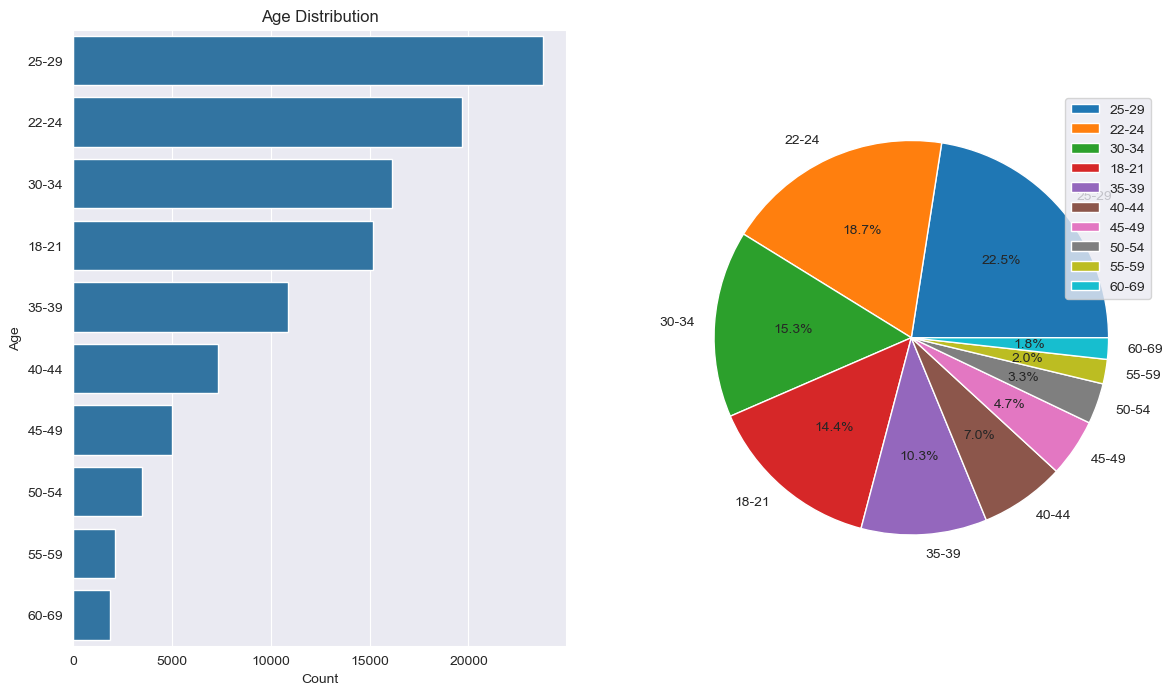

In [25]:
# Show Age Distribution
fig, ax = plt.subplots(1, 2, figsize=(14, 8))
c_age = kaggle_data['Q1'].value_counts().head(10)
sns.barplot(x=c_age.values, y=c_age.index, ax=ax[0])
ax[0].set_xlabel('Count')
ax[0].set_ylabel('Age')
ax[0].set_title('Age Distribution')
ax[1].pie(c_age, labels=c_age.index, autopct='%1.1f%%')
ax[1].legend(loc='best')
plt.show()

In [38]:
c_gender = kaggle_data['Q2'].value_counts()[:-1]
gender_dict = {'Male': c_gender['Male'] + c_gender['Man'],
               'Female': c_gender['Female'] + c_gender['Woman'],
               'Nonbinary': c_gender['Nonbinary'] + c_gender['Non-binary, genderqueer, or gender non-conforming'] + c_gender['A different identity'],
               'Not-To-Say': c_gender['Prefer not to say'] + c_gender['Prefer to self-describe'],
               }
gender_dict

{'Male': 85565, 'Female': 18768, 'Nonbinary': 373, 'Not-To-Say': 1500}

In [36]:
print(c_gender)

Q2
Male                                                 49178
Man                                                  36387
Female                                               10000
Woman                                                 8768
Prefer not to say                                     1276
Prefer to self-describe                                224
A different identity                                   159
Nonbinary                                              140
Non-binary, genderqueer, or gender non-conforming       74
Name: count, dtype: int64


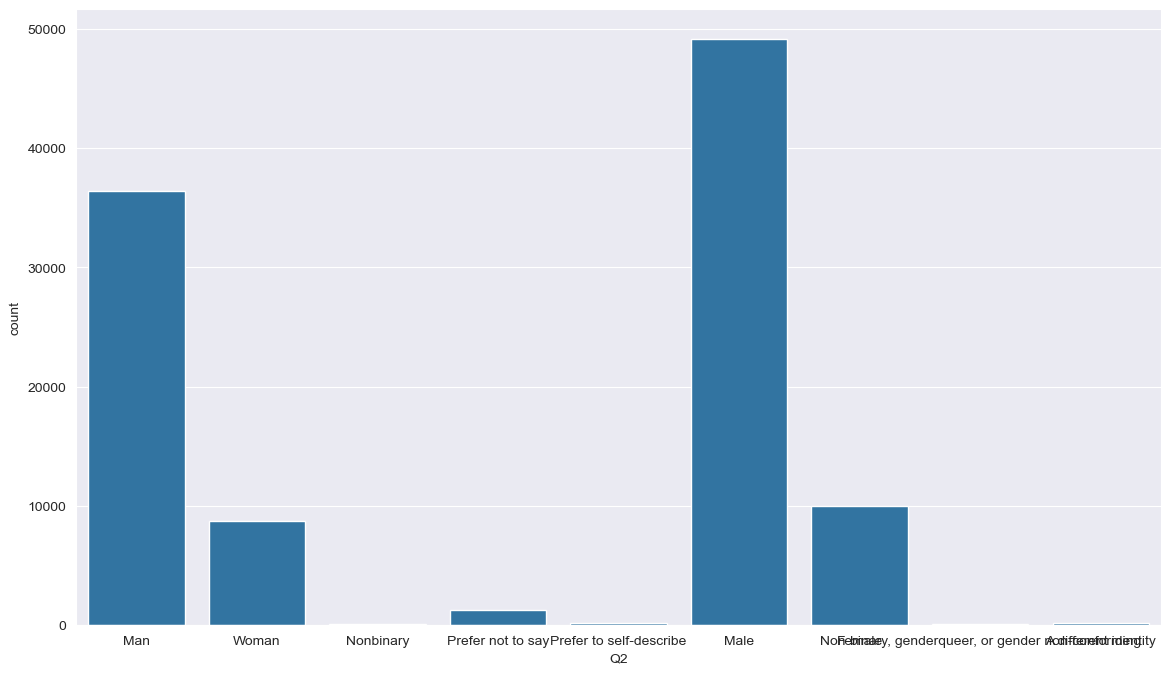

In [51]:
plt.figure(figsize = (14, 8))
sns.countplot(x=kaggle_data['Q2'][1:],)
plt.show()

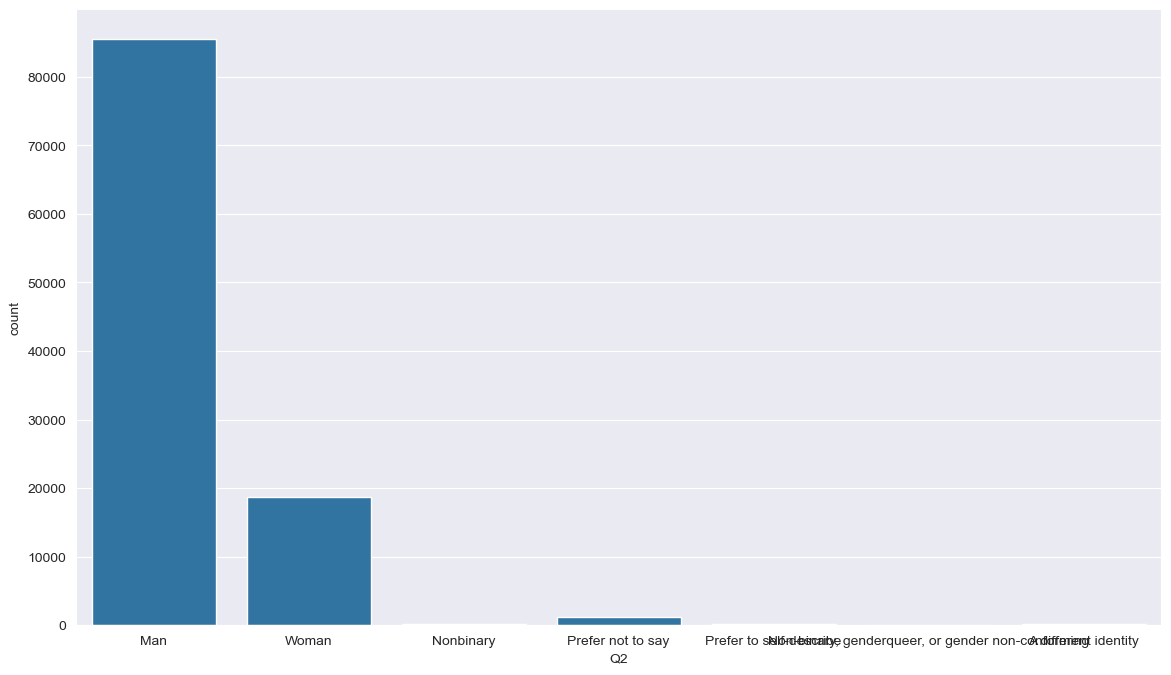

In [53]:
kaggle_data['Q2'].replace({'Male':'Man', 'Female':'Woman',}, inplace=True)
plt.figure(figsize = (14, 8))
sns.countplot(x=kaggle_data['Q2'][1:],)
plt.show()

In [54]:
kaggle_data['Q2'].value_counts()

Q2
Man                                                  85565
Woman                                                18768
Prefer not to say                                     1276
Prefer to self-describe                                224
A different identity                                   159
Nonbinary                                              140
Non-binary, genderqueer, or gender non-conforming       74
What is your gender? - Selected Choice                   1
Name: count, dtype: int64

In [60]:
kaggle_data['Q2'].replace({r'^Non-binary.*':'Nonbinary'}, inplace=True, regex=True)
print(kaggle_data['Q2'].value_counts())

Q2
Man                                       85565
Woman                                     18768
Prefer not to say                          1276
Prefer to self-describe                     224
Nonbinary                                   214
A different identity                        159
What is your gender? - Selected Choice        1
Name: count, dtype: int64


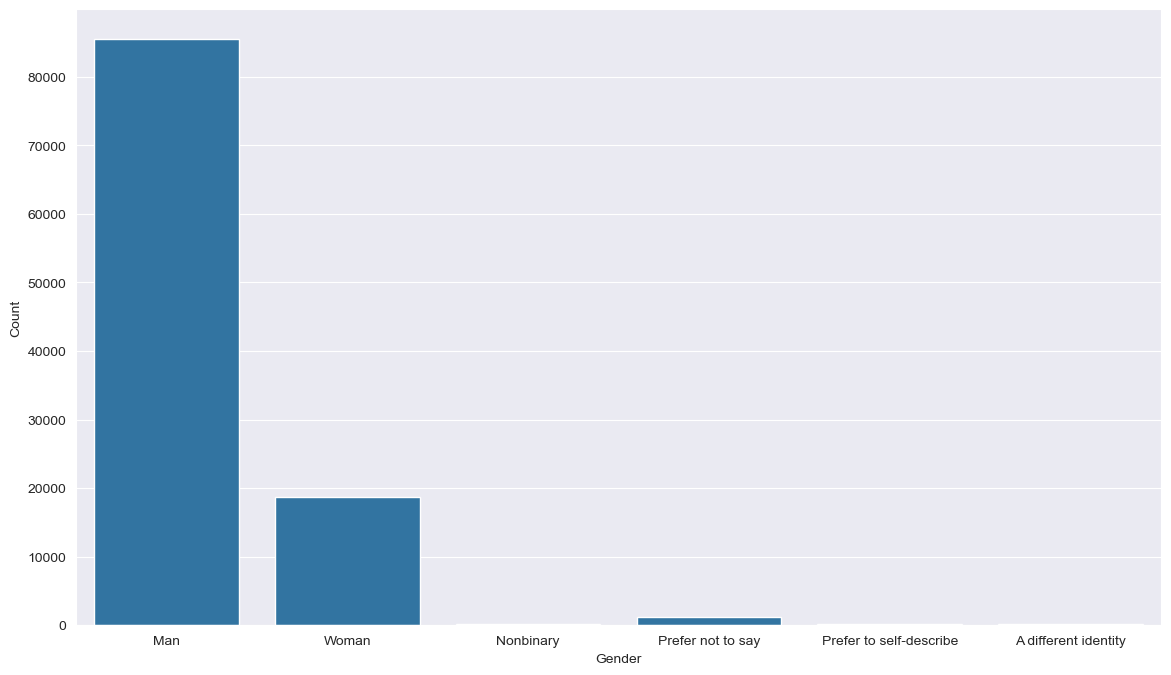

In [62]:
plt.figure(figsize = (14, 8))
sns.countplot(x=kaggle_data['Q2'][1:],)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

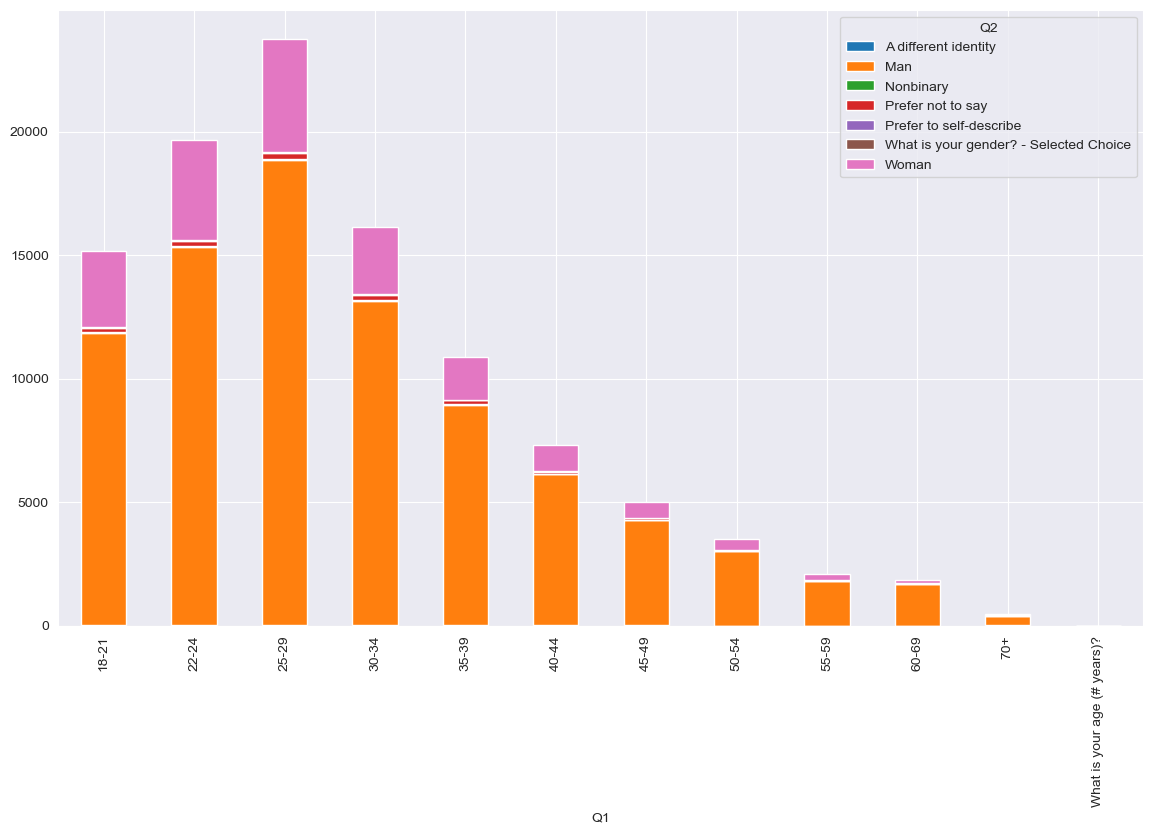

In [68]:
gender_by_age = kaggle_data.groupby(['Q1', 'Q2']).size().unstack(fill_value=0)
gender_by_age.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.show()

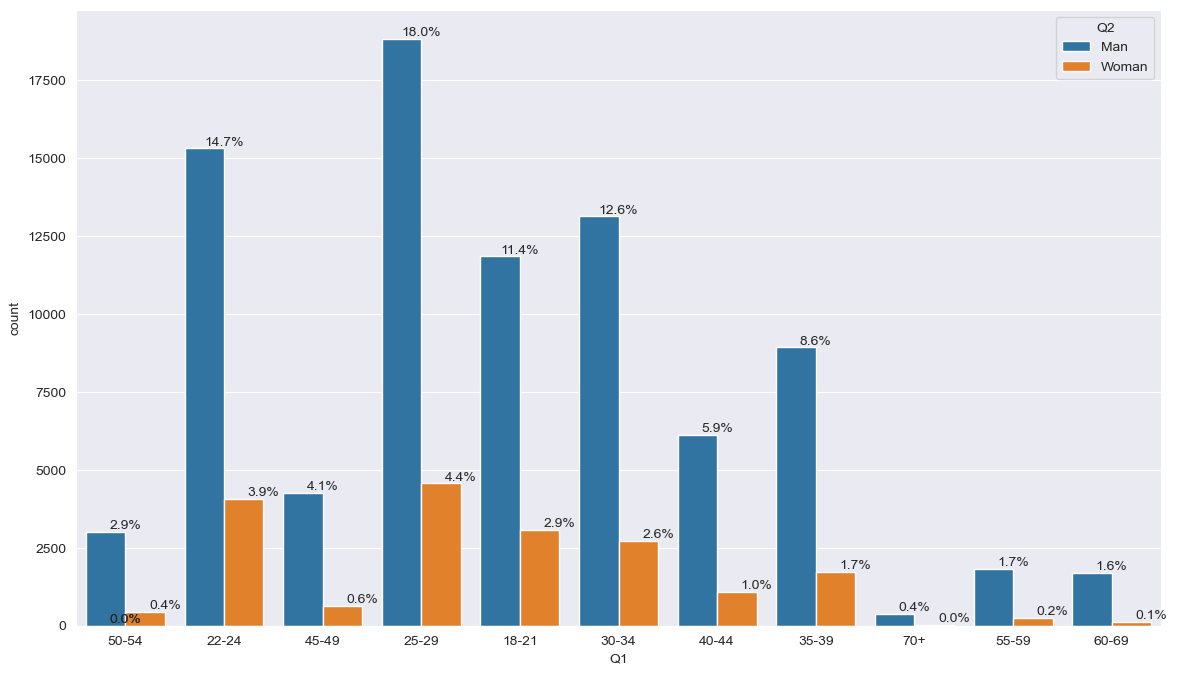

In [78]:
fig, ax = plt.subplots(figsize=(14, 8))
data = kaggle_data[kaggle_data['Q2'].isin(["Man", "Woman"])]
sns.countplot(x='Q1', data=data, hue='Q2', ax=ax)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/ float(data.shape[0]))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()

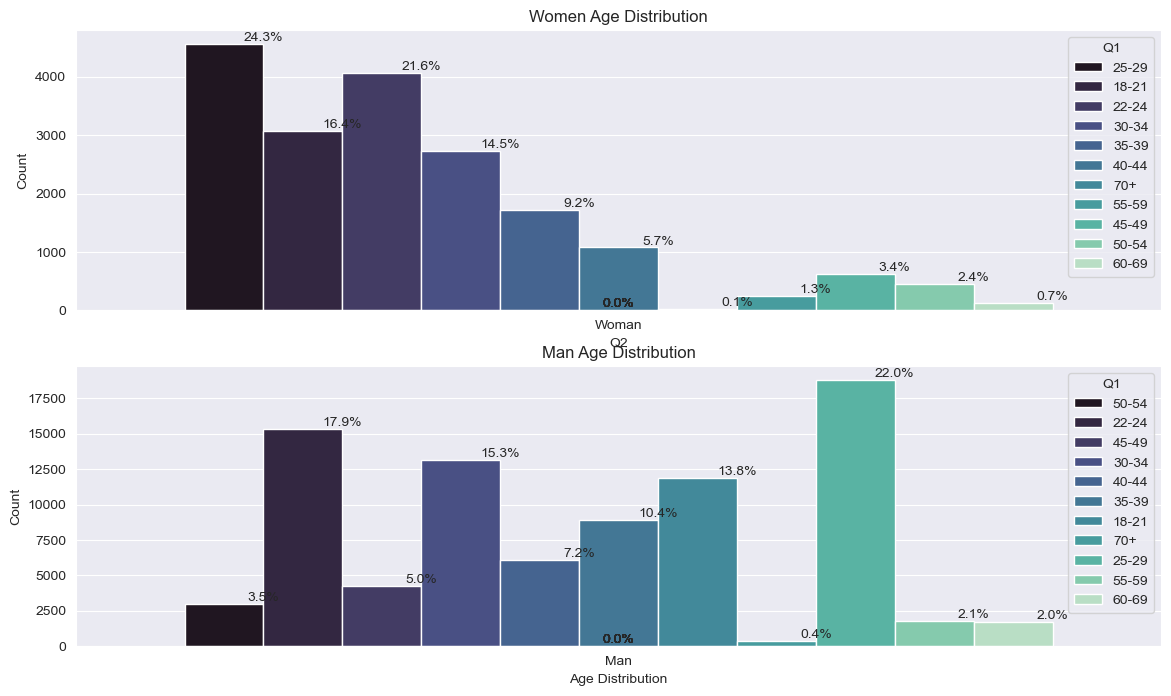

In [94]:
fig, ax = plt.subplots(2,1,figsize=(14, 8), dpi=100)
women_data = kaggle_data[kaggle_data['Q2'].isin(["Woman"])]
man_data = kaggle_data[kaggle_data['Q2'].isin(["Man"])]
sns.countplot(x='Q2', data=women_data, hue='Q1', ax=ax[0], palette='mako')
for p in ax[0].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / women_data.shape[0])
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax[0].annotate(percentage, (x, y), ha='center', va='bottom')
ax[0].set_ylabel('Count')
ax[0].set_title('Women Age Distribution')

sns.countplot(x='Q2', data=man_data, hue='Q1', ax=ax[1], palette='mako')
for p in ax[1].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / man_data.shape[0])
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax[1].annotate(percentage, (x, y), ha='center', va='bottom')
ax[1].set_xlabel('Age Distribution')
ax[1].set_ylabel('Count')
ax[1].set_title('Man Age Distribution')
plt.show()

In [96]:
kaggle_data.head(2)

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
print(kaggle_data['Q4'].value_counts())

Q4
Masterâ€™s degree                                                                                                  37395
Bachelorâ€™s degree                                                                                                29961
Doctoral degree                                                                                                    13568
Master's degree                                                                                                     6273
Bachelor's degree                                                                                                   4811
Some college/university study without earning a bachelorâ€™s degree                                                 4631
Professional degree                                                                                                 2360
I prefer not to answer                                                                                              1794
No formal education past high

In [103]:
kaggle_data['Q4'].replace({r'^Bachel.*':'Bachelor', r'^Master.*': 'Master', r'Some college.*': 'Other UNI No Bachelor'}, inplace=True, regex=True)
print(kaggle_data['Q4'].value_counts())

Q4
Master                                                                                                             43668
Bachelor                                                                                                           34772
Doctoral degree                                                                                                    13568
Other UNI No Bachelor                                                                                               5417
Professional degree                                                                                                 2360
I prefer not to answer                                                                                              1794
No formal education past high school                                                                                1122
Professional doctorate                                                                                               360
I did not complete any formal

/var/folders/j0/tr2332417vjbmj74tfc0dcd40000gn/T/ipykernel_15304/1058707974.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  kaggle_data['Q4'].replace({r'^Bachel.*':'Bachelor', r'^Master.*': 'Master', r'Some college.*': 'Other UNI No Bachelor'}, inplace=True, regex=True)


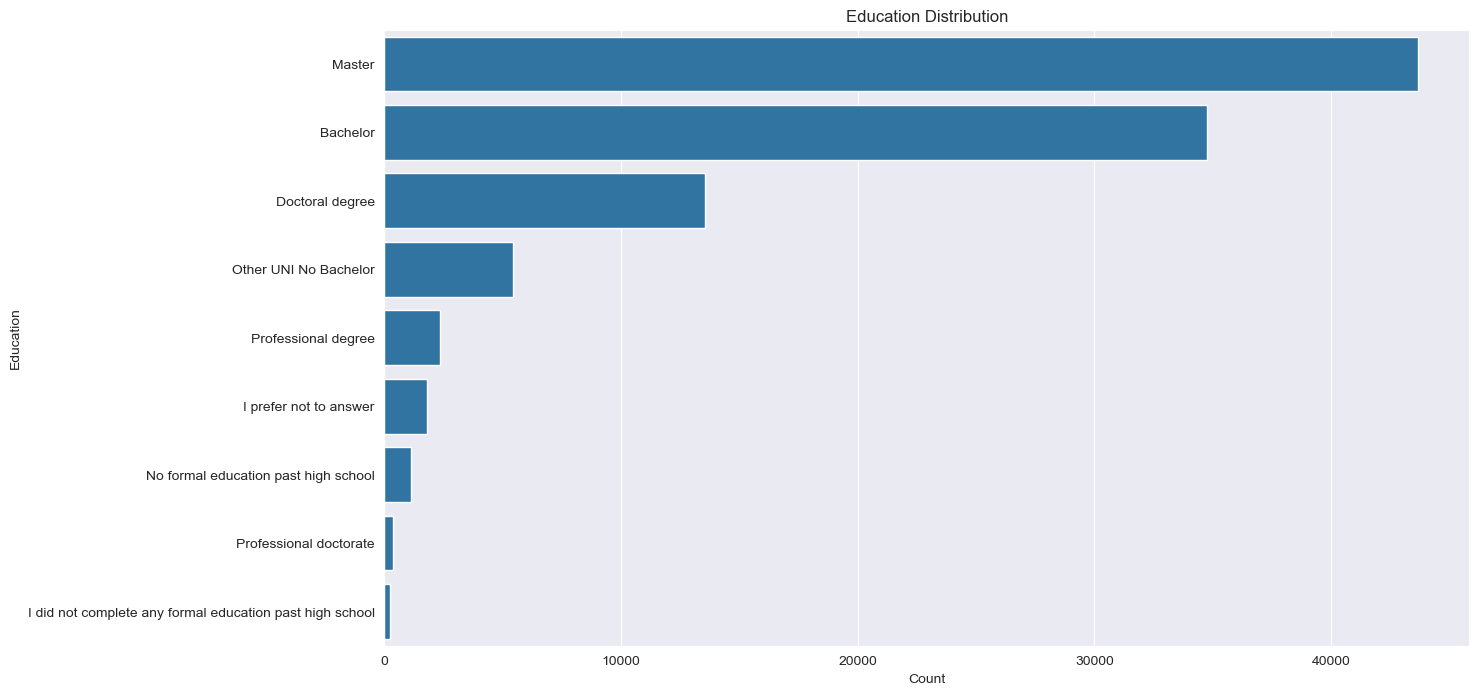

In [114]:
c_ed = kaggle_data['Q4'].value_counts().head(9)
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x=c_ed.values, y=c_ed.index, ax=ax)
ax.set_title('Education Distribution')
ax.set_xlabel('Count')
ax.set_ylabel('Education')
plt.show()

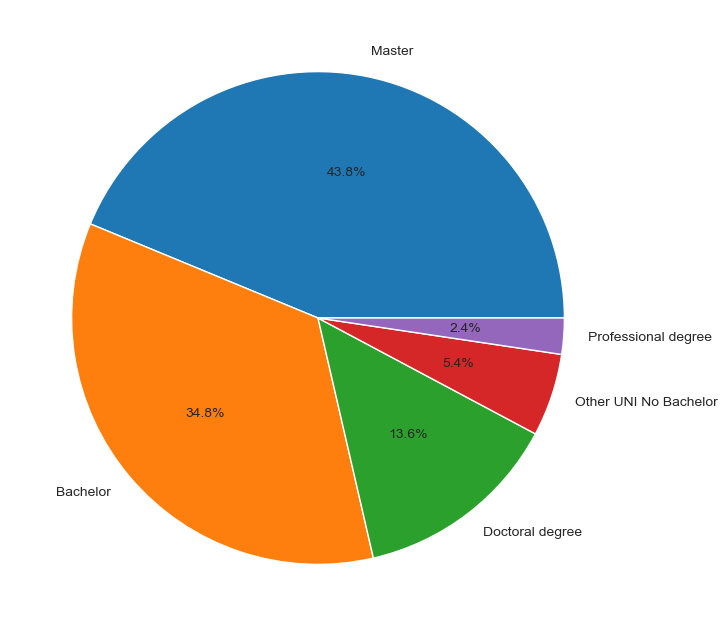

In [117]:
# Pie chart distribution for education.
plt.figure(figsize = (14, 8))
plt.pie(c_ed.values[:5], labels=c_ed.index[:5], autopct='%1.1f%%')
plt.show()

In [126]:
print(kaggle_data['Q8'].value_counts()[:-1])
c_program = kaggle_data['Q8'].value_counts()[:-1]


Q8
Python        66892
R              9032
SQL            4303
C++            1300
C               894
Java            835
MATLAB          828
Other           700
Javascript      340
C/C++/C#        307
Julia           288
Matlab          238
Scala           168
SAS             157
Bash             99
VBA              38
Swift            32
Stata            28
Go               26
Haskell          17
TypeScript        5
F#                4
Name: count, dtype: int64


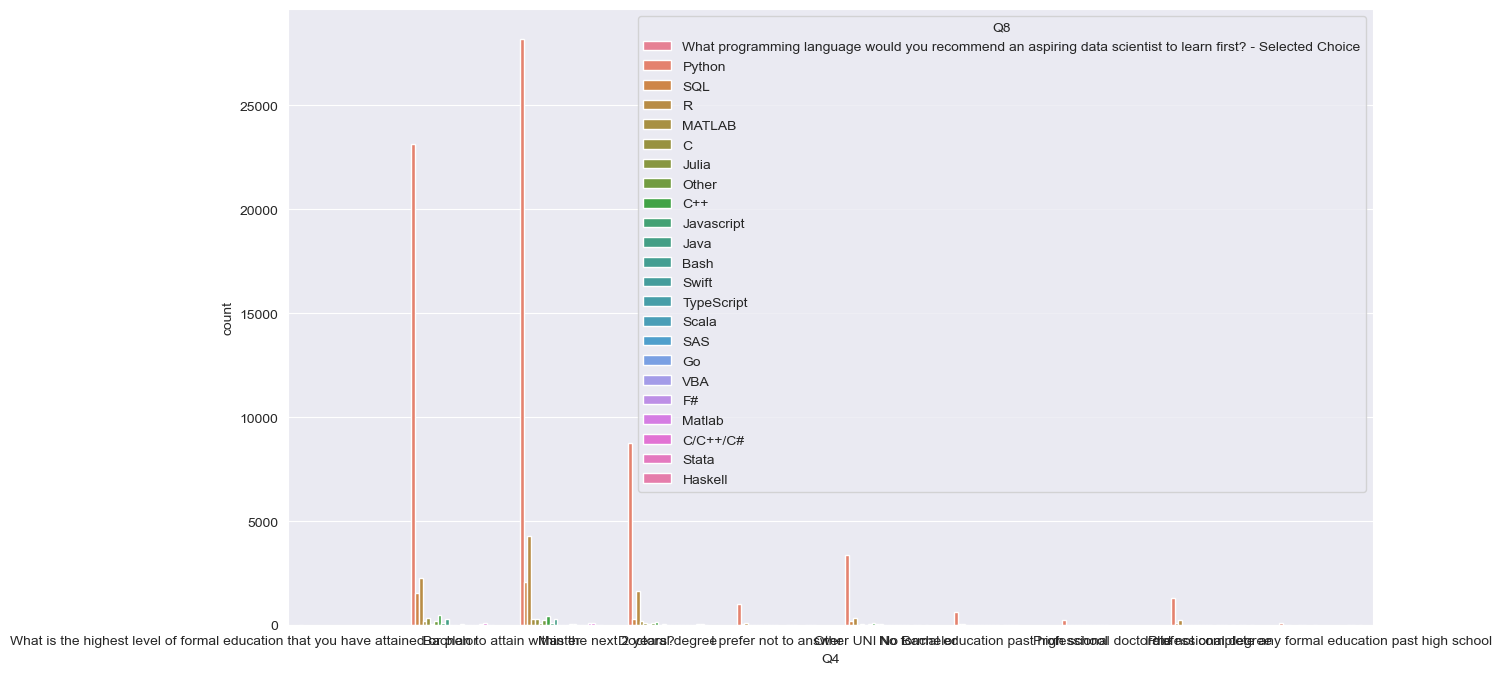

In [129]:
plt.figure(figsize = (14, 8))
sns.countplot(x='Q4', data=kaggle_data, hue='Q8')
plt.show()

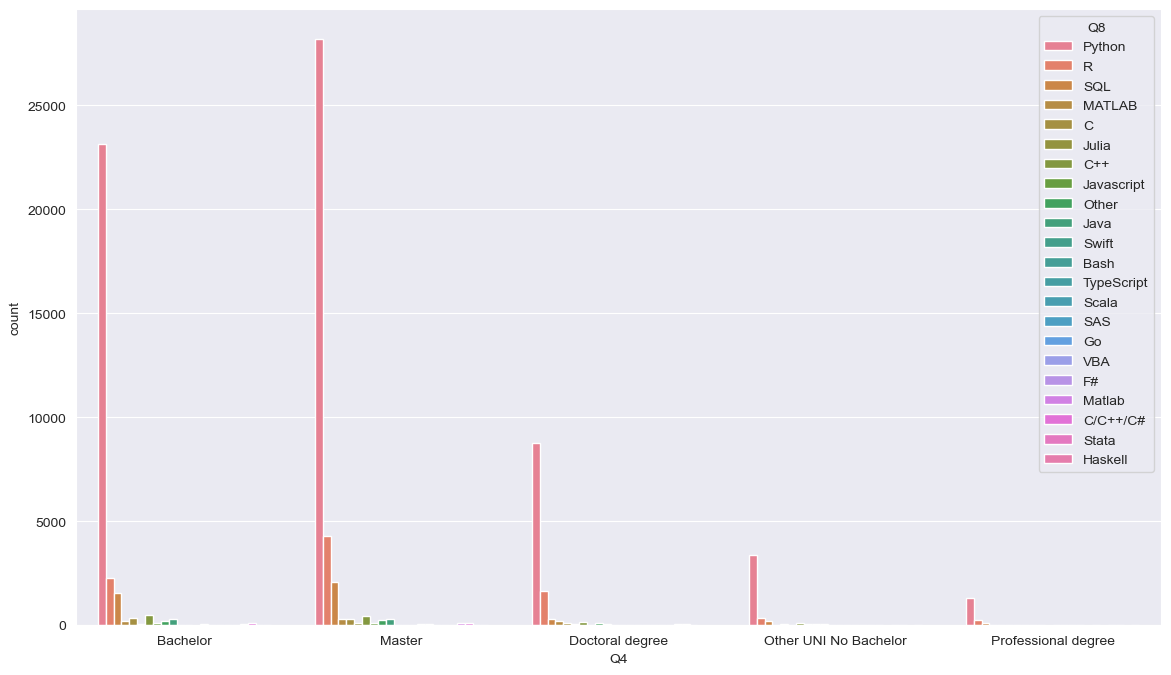

In [133]:
top_5_q4 = kaggle_data['Q4'].value_counts().head(5).index
filtered_data = kaggle_data[kaggle_data['Q4'].isin(top_5_q4)]

plt.figure(figsize = (14, 8))
sns.countplot(x='Q4', data=filtered_data, hue='Q8')
plt.show()